## Sentiment analysis Using [RandomForestClassifier, LogisticRegression, SVM, Naive Bayes] and comparing their respective accuracy


### Author: Ashwin.K.A 


In [64]:
import numpy as np 
import pandas as pd 
import re
import nltk 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline


In [65]:
data_source_url = "C:/Users/Ashwin/Desktop/ML/Tweets.csv"
airline_tweets = pd.read_csv(data_source_url)

In [66]:
airline_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,negative,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica OMG it was sooo late.,NaN,NaN,NaN,NaN
1,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24-2-15 11:35,NaN,Eastern Time (US & Canada)
2,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24-2-15 11:15,NaN,Pacific Time (US & Canada)
3,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24-2-15 11:15,Lets Play,Central Time (US & Canada)
4,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24-2-15 11:15,NaN,Pacific Time (US & Canada)


In [67]:
airline_tweets.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [68]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


In [69]:
plot_size

[8, 6]

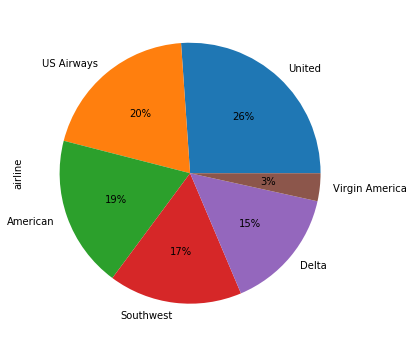

In [70]:
airline_tweets.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

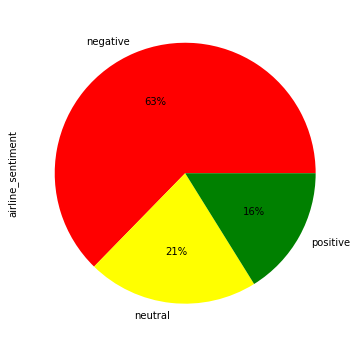

In [71]:
airline_tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

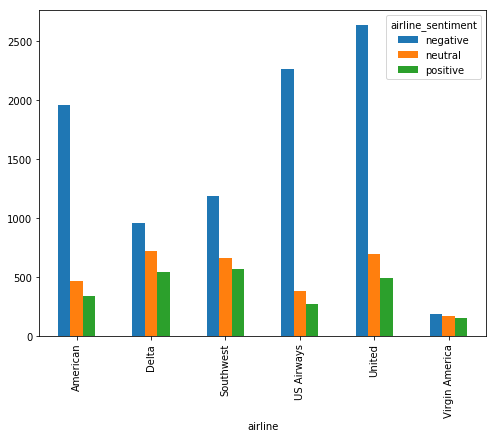

In [72]:
airline_sentiment = airline_tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

In [73]:
features = airline_tweets.iloc[:, 10].values
labels = airline_tweets.iloc[:, 1].values

In [74]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [75]:
sent=pd.DataFrame(np.column_stack([processed_features,labels]),columns=['Text', 'Sentiment'])
sent.head()
#print(processed_features[0],labels[0])

,Text,Sentiment
0,virginamerica omg it was sooo late,negative
1,virginamerica what dhepburn said,neutral
2,virginamerica plus you ve added commercials t...,positive
3,virginamerica didn today must mean need to ta...,neutral
4,virginamerica it really aggressive to blast o...,negative


In [76]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500,stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features)


In [77]:
print(processed_features.shape)

(14641, 2500)


In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.3, random_state=40)
Accuracy=[]
Model=[]

# Random forest

In [79]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=700, random_state=40)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=None,
            oob_score=False, random_state=40, verbose=0, warm_start=False)

In [80]:
predictions = model.predict(X_test)

In [81]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))

print(accuracy_score(y_test, predictions))
Model.append(model.__class__.__name__)
Accuracy.append(accuracy_score(y_test, predictions))

[[2622  125   51]
 [ 506  335   74]
 [ 224   92  364]]
0.7559754154336444


# logistic regression

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
model=LogisticRegression(multi_class='multinomial',solver='newton-cg',max_iter=1000,random_state=40)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [84]:
print('Accuracy:{}'.format(accuracy_score(y_test,y_pred)))
Model.append(model.__class__.__name__)
Accuracy.append(accuracy_score(y_test,y_pred))


Accuracy:0.7848850443888004


In [85]:
Accuracy

[0.7559754154336444, 0.7848850443888004]

## SVM

In [86]:
from sklearn.svm import SVC
model = SVC(kernel='linear', random_state=40)
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=40,
  shrinking=True, tol=0.001, verbose=False)

In [87]:
y_pred = model.predict(X_test)

In [88]:
print(confusion_matrix(y_test,y_pred))

print(accuracy_score(y_test, y_pred))
Model.append(model.__class__.__name__)
Accuracy.append(accuracy_score(y_test,y_pred))

[[2569  171   58]
 [ 414  438   63]
 [ 166   86  428]]
0.781925791031186


## Naive Bayes

In [89]:
from sklearn.naive_bayes import ComplementNB

model = ComplementNB()
model.fit(X_train, y_train)

ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

In [90]:
predicted = model.predict(X_test)

In [91]:
print(np.mean(predicted == y_test))

0.7616662872752106


In [92]:
print(confusion_matrix(y_test, predicted))
cm=confusion_matrix(y_test, predicted)

[[2328  280  190]
 [ 276  501  138]
 [  79   84  517]]


In [93]:
Model.append(model.__class__.__name__)
Accuracy.append(accuracy_score(y_test,predicted))

In [94]:
print(Model)
print(Accuracy)

['RandomForestClassifier', 'LogisticRegression', 'SVC', 'ComplementNB']
[0.7559754154336444, 0.7848850443888004, 0.781925791031186, 0.7616662872752106]


Text(0.5, 1.0, 'Accuracies of Models')

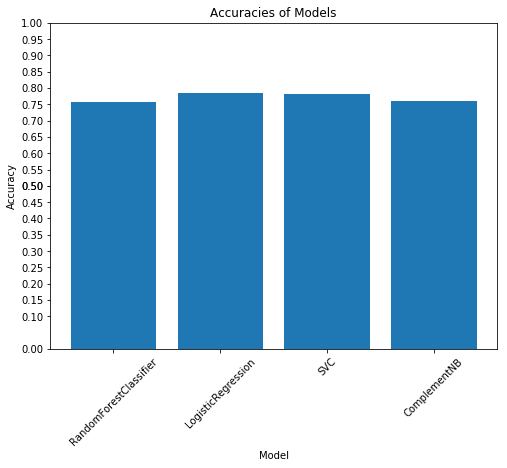

In [95]:
Index = [1,2,3,4]
plt.bar(Index,Accuracy)
plt.xticks(Index, Model, rotation=45)
plt.yticks([0.0, 0.5, 0.10, 0.15, 0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1])
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')